/var/folders/s6/4wdnb9rx1cl3r28sklncyvs00000gs/T/ipykernel_95865/66923191.py:12: RuntimeWarning: divide by zero encountered in log10
  HyMAG=np.array([np.log10(np.linalg.norm(ii)) for ii in Hy])


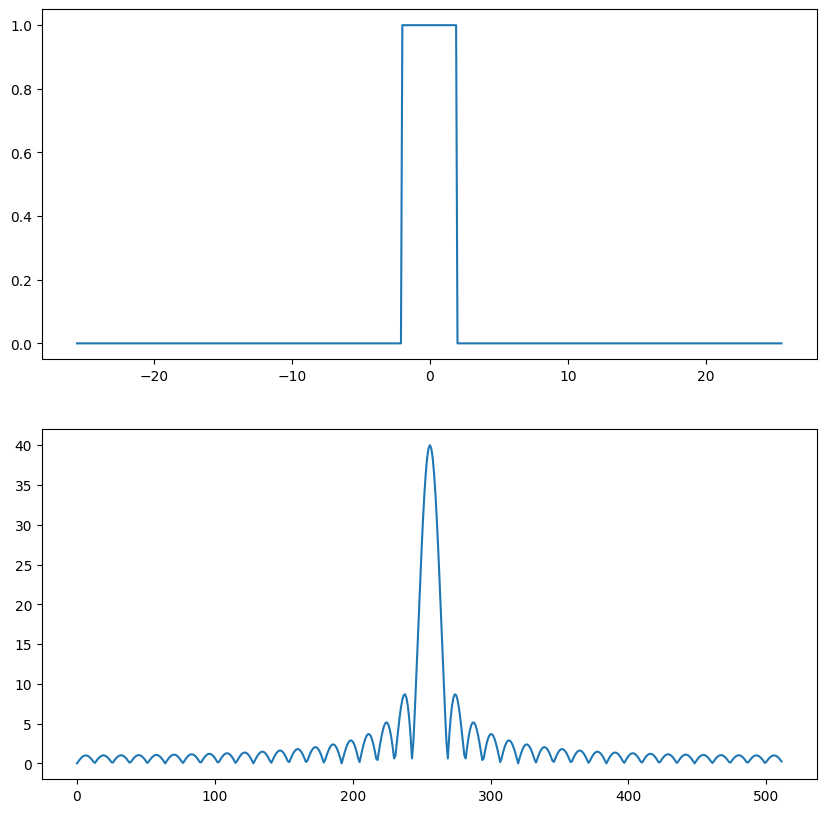

In [2]:
#plot 1D Sky View function and its fft (which is the interference pattern)
#
# 
import numpy as np
from matplotlib import pyplot as plt
x=np.arange(-25.6,25.6,0.1,dtype=float)
y=np.zeros(512)+1e-15
y[np.abs(x)<2.0]=1.0
fig,ax=plt.subplots(2,1,figsize=(10,10))
ax[0].plot(x,y)
Hy=np.fft.fftshift(np.fft.fft(np.fft.ifftshift(y)))
HyMAG=np.array([np.log10(np.linalg.norm(ii)) for ii in Hy])
HyMAG=np.array([np.linalg.norm(ii) for ii in Hy])
#HyMAG=np.array([np.linalg.norm(ii) for ii in Hy])
ax[1].plot(HyMAG)



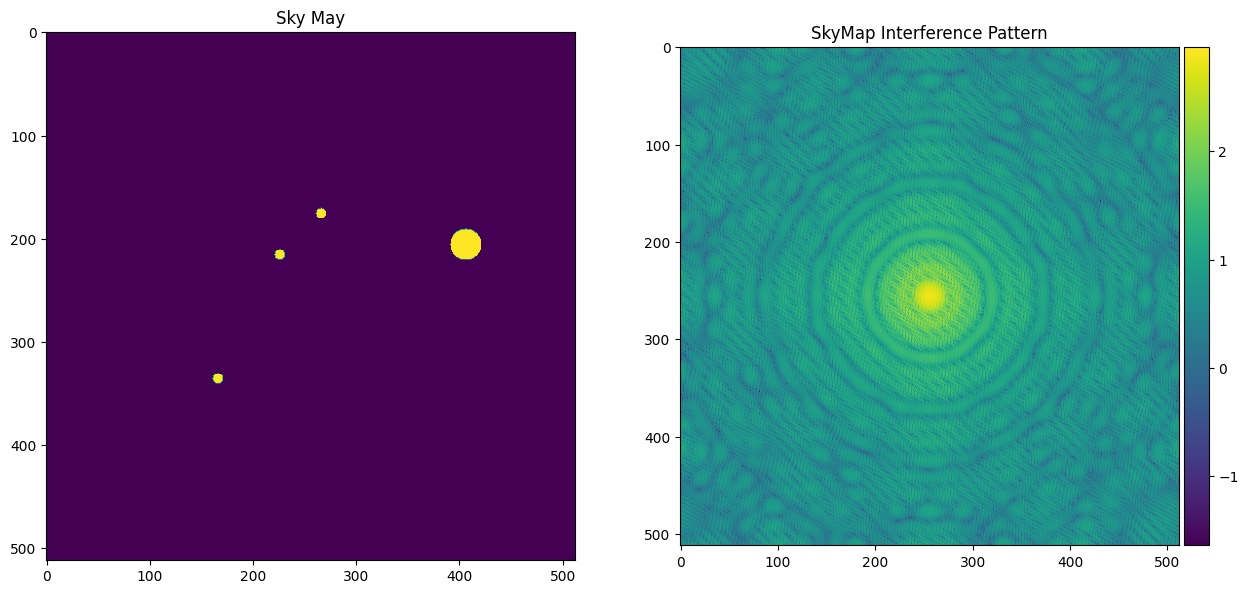

In [3]:
# Create Sky view and show FFT of sky.

from mpl_toolkits.axes_grid1 import make_axes_locatable
def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

stepSize=0.1

dot=lambda mx,my,r,s,o : np.array([[0. if ((x+o[0])**2+(y+o[1])**2)>(r*r) else 1. for x in np.arange(-mx,mx,s)] for y in np.arange(-my,my,s)])

#SKYMAP DOTS
yy=dot(25.6,25.6,1.5,stepSize,(-15.,5.))  + \
   dot(25.6,25.6,0.5,stepSize,(3.,4.)) +  \
   dot(25.6,25.6,0.5,stepSize,(-1.,8.))+  \
   dot(25.6,25.6,0.5,stepSize,(9.,-8.))
Hyy=calculate_2dft(yy)
HyyMAG=np.array([[np.log10(np.linalg.norm(ii)) for ii in jj] for jj in Hyy])

fig,ax=plt.subplots(1,2,figsize=(15,15))
#ax[0].imshow(yy)
im=[ax[jjj].imshow(data) for jjj,data in enumerate([yy,HyyMAG])]
[ax[jjj].set_title(data) for jjj,data in enumerate(["Sky May","SkyMap Interference Pattern"])]

# plt.colorbar(im[1],ax=ax[1])
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im[1], cax=cax, orientation='vertical')


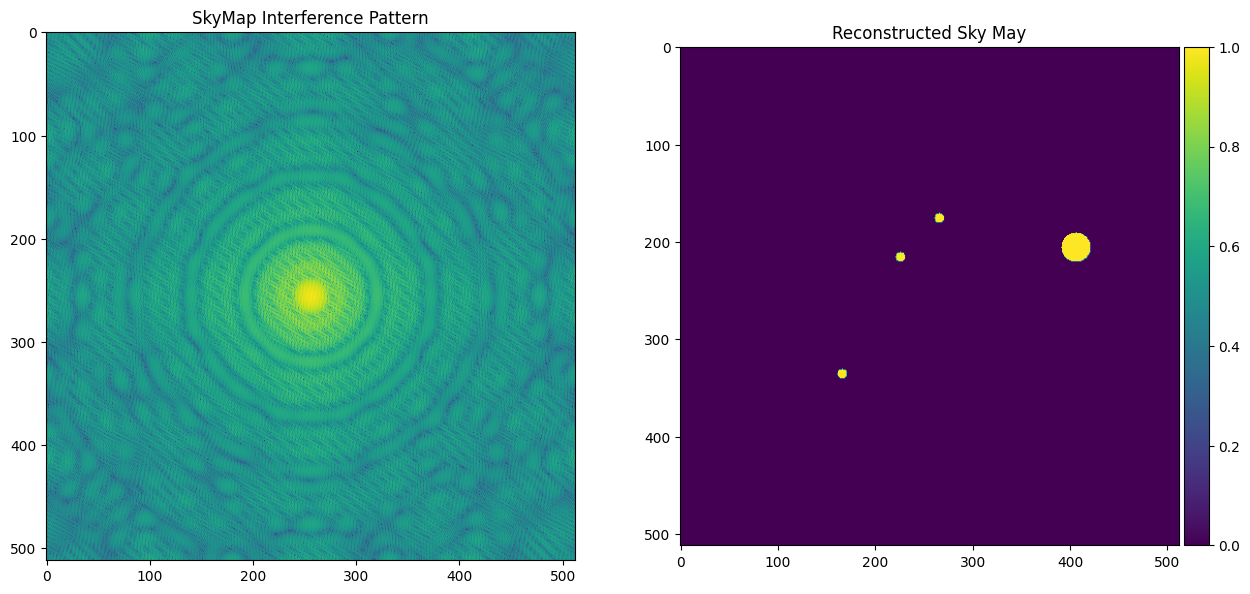

In [4]:
#INVERT the interference pattern back to original

def calculate_2dift(input):
    ft = np.fft.fftshift(input)
    ft = np.fft.ifft2(ft)
    return np.fft.ifftshift(ft)

BackHyyMAG=calculate_2dift(Hyy)
fig,ax=plt.subplots(1,2,figsize=(15,15))
#ax[0].imshow(yy)
im=[ax[jjj].imshow(data) for jjj,data in enumerate([HyyMAG,BackHyyMAG.real])]
[ax[jjj].set_title(data) for jjj,data in enumerate(["SkyMap Interference Pattern","Reconstructed Sky May"])]

# plt.colorbar(im[1],ax=ax[1])
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im[1], cax=cax, orientation='vertical')



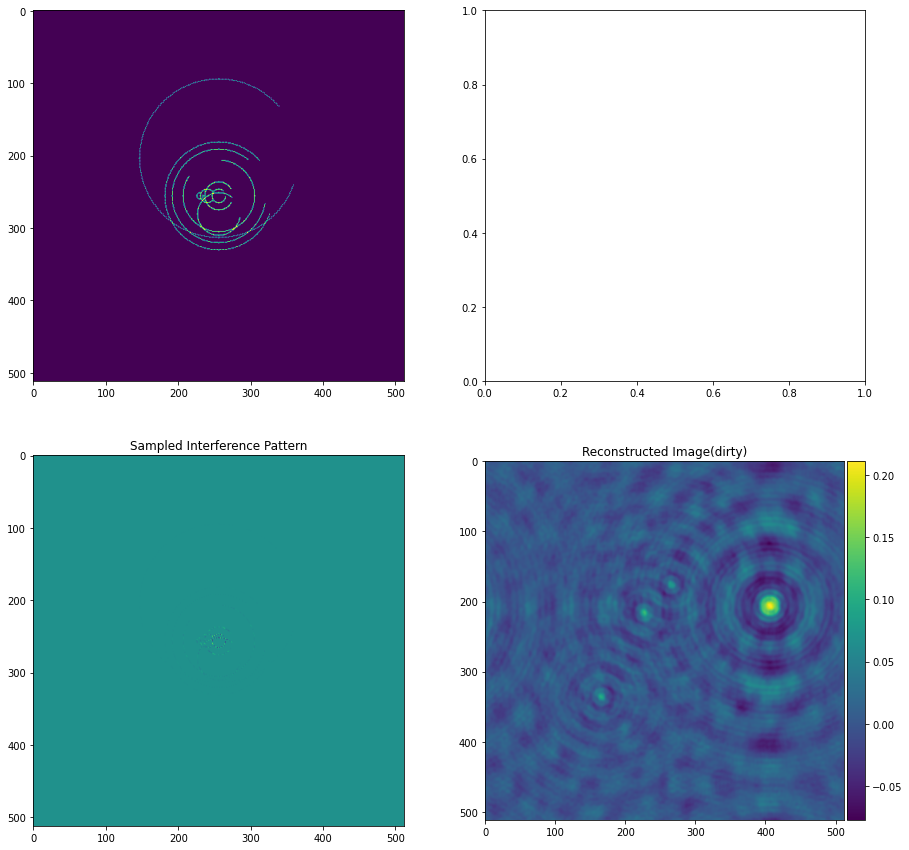

In [11]:
#implement a sampling function which samples part of the interference pattern.
#
# ifft the sampled sky view gives the dirty image of the sky 
#
import random
rotMat = lambda rot:np.matrix([[np.cos(rot/57.295779513),-np.sin(rot/57.295779513)],[np.sin(rot/57.295779513),np.cos(rot/57.295779513)]])
rotate = lambda rot,xy:tuple((np.int16(rotMat(rot)*np.matrix(xy).transpose())).transpose().tolist()[0])
r=[(10,60,0.5,0.47),(30,80,0.55,0.5),(110,70,0.4,0.5), \
   (5,110,0.5,0.45),(20,60,0.5,0.5),(50,175,0.5,0.5),  \
     (65,80,0.5,0.5),(20,60,0.5,0.5),(75,70,0.5,0.5),   \
     (20,60,0.5,0.5),(50,175,0.5,0.5),(10,80,0.5,0.5),  \
     (20,60,0.5,0.5)]
# 
t=300
sample=np.zeros(Hyy.shape)
for ll in r:
    for lll in [rotate(ll[1]-t,(ll[0],0)) for t in range(t)]:
        # sample[lll[0]+len(Hyy[0])//2][lll[1]+len(Hyy)//2]=1.0  #Hyy[lll[0]+len(Hyy[0])//2][lll[1]+len(Hyy)//2]
        sample[int(lll[0]+len(Hyy[0])*ll[2])][int(lll[1]+len(Hyy)*ll[3])]=1.0  #Hyy[lll[0]+len(Hyy[0])//2][lll[1]+len(Hyy)//2]
fig,ax=plt.subplots(2,2,figsize=(15,15))
im=[[1,2],[0,0]]
sampleOut=sample*Hyy
BackHyyMAG=calculate_2dift(sampleOut)
im[0][0]=ax[0][0].imshow(sample)
im[1][0]=ax[1][0].imshow(sampleOut.real)
im[1][1]=ax[1][1].imshow(BackHyyMAG.real)
[ax[1][jjj].set_title(data) for jjj,data in enumerate(["Sampled Interference Pattern","Reconstructed Image(dirty)"])]
# #ax[0].imshow(yy)
# im=[ax[jjj].imshow(data) for jjj,data in enumerate([sample,BackHyyMAG.real])]
# plt.colorbar(im[1],ax=ax[1])
divider = make_axes_locatable(ax[1][1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im[1][1], cax=cax, orientation='vertical')



In [60]:
Hyy.shape

(512, 512)

In [ ]:
radiusOfSun=6.96342e5*1000  #m
lightYear=9.4607e15 #m
 

In [ ]:
#write a function which creates a 512x512 array of signal sources

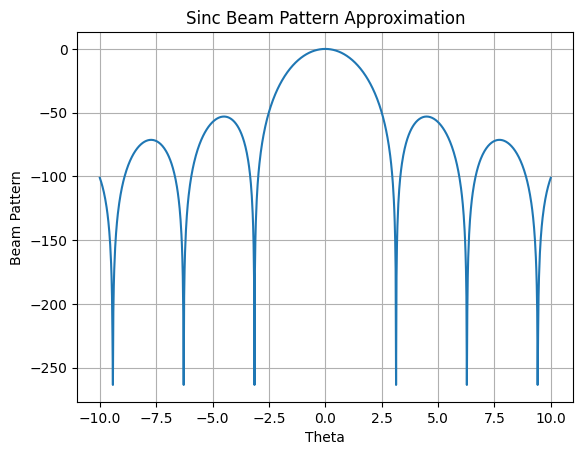

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sinc function
def sinc(x):
    return (np.sinc(x/np.pi)**2)

# Define the beam pattern approximation
def beam_pattern(theta):
    return sinc(theta)

# Generate theta values
rng=10 #np.pi*6.9
theta = np.linspace(-rng, rng, 1001)

# Calculate the beam pattern approximation
beam_values = beam_pattern(theta)+1e-12

# Plot the beam pattern
plt.plot(theta, 20*np.log10(beam_values**2))
plt.xlabel('Theta')
plt.ylabel('Beam Pattern')
plt.title('Sinc Beam Pattern Approximation')
#plt.ylim((-10, 0))
plt.grid(True)
plt.show()


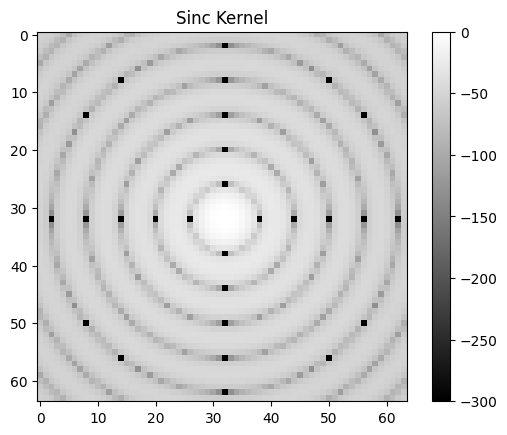

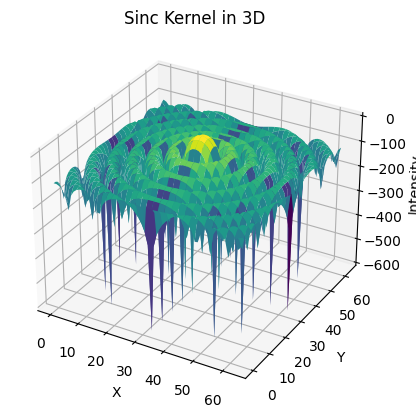

In [45]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def generate_sinc_kernel(size, sigma):
    kernel = np.zeros((size, size))
    center = size // 2
    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            distance = np.sqrt(x**2 + y**2)
            kernel[i, j] = np.sinc(distance / sigma)**2+1e-15
    return kernel

# Example usage
kernel_size = 64
sigma = 6.0
sinc_kernel = generate_sinc_kernel(kernel_size, sigma)

#plot the sinc kernel and an example of its use
plt.imshow(20*np.log10(sinc_kernel), cmap='gray')
plt.title('Sinc Kernel')
plt.colorbar()
plt.show()


# Create a meshgrid for x and y coordinates
x = np.arange(kernel_size)
y = np.arange(kernel_size)
X, Y = np.meshgrid(x, y)

# Plot the sinc kernel in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, 20*np.log10(sinc_kernel**2), cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.set_title('Sinc Kernel in 3D')
plt.show()





In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Create a step function
step_function = np.zeros((512, 512))
step_function[np.abs(x-256) < 2.0 for ] = 1.0

# Perform 2D FFT on the step function
fft_step_function = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(step_function)))

# Calculate the magnitude of the FFT
fft_magnitude = np.abs(fft_step_function)

# Create the 2D sinc kernel
sinc_kernel = np.sinc(fft_magnitude)

# Plot the sinc kernel as an image
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(sinc_kernel, cmap='gray')
plt.title('2D Sinc Kernel')
plt.colorbar()

# Plot 1D slices of the kernel along cardinal axes
plt.subplot(2, 2, 2)
plt.plot(sinc_kernel[256, :], label='X-axis')
plt.plot(sinc_kernel[:, 256], label='Y-axis')
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.title('1D Slices of Sinc Kernel')
plt.legend()

# Plot the step function
plt.subplot(2, 2, 3)
plt.imshow(step_function, cmap='gray')
plt.title('Step Function')
plt.colorbar()

# Plot 1D slices of the step function along cardinal axes
plt.subplot(2, 2, 4)
plt.plot(step_function[256, :], label='X-axis')
plt.plot(step_function[:, 256], label='Y-axis')
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.title('1D Slices of Step Function')
plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'x' is not defined

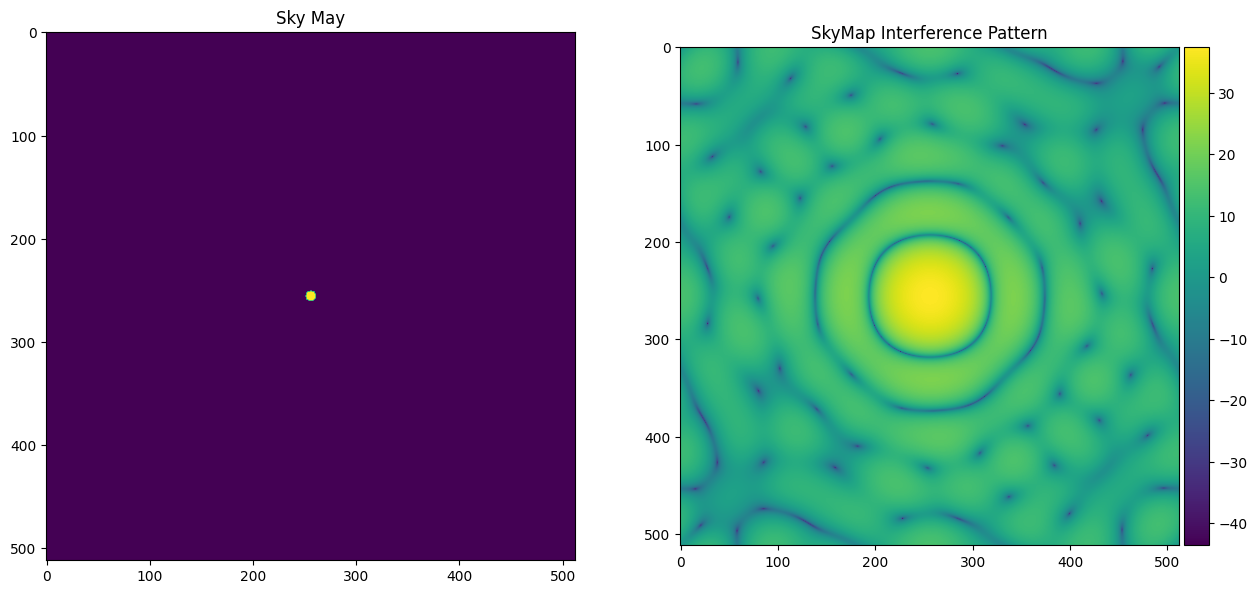

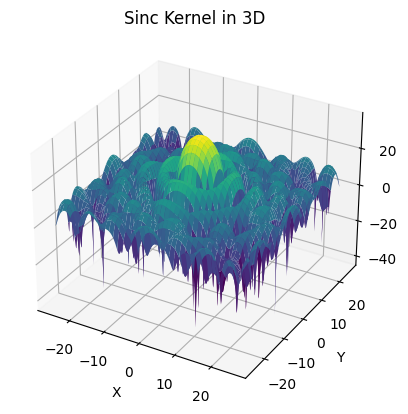

In [39]:
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable


def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

stepSize=0.1
dot=lambda mx,my,r,s,o : np.array([[0. if ((x+o[0])**2+(y+o[1])**2)>(r*r) else 1. for x in np.arange(-mx,mx,s)] for y in np.arange(-my,my,s)])

yy=dot(25.6,25.6,0.5,stepSize,(0,0))
Hyy=calculate_2dft(yy)
HyyMAG=np.array([[20*np.log10(np.linalg.norm(ii)) for ii in jj] for jj in Hyy])


fig,ax=plt.subplots(1,2,figsize=(15,15))
#ax[0].imshow(yy)
im=[ax[jjj].imshow(data) for jjj,data in enumerate([yy,HyyMAG])]
[ax[jjj].set_title(data) for jjj,data in enumerate(["Sky May","SkyMap Interference Pattern"])]

# plt.colorbar(im[1],ax=ax[1])
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im[1], cax=cax, orientation='vertical')

# Plot the sinc kernel in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.linspace(-25.6,25.6,512),np.linspace(-25.6,25.6,512))

ax.plot_surface(X,Y , HyyMAG, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.set_title('Sinc Kernel in 3D')
plt.show()


